In [1]:
#@title Import
from  sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RepeatedKFold

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




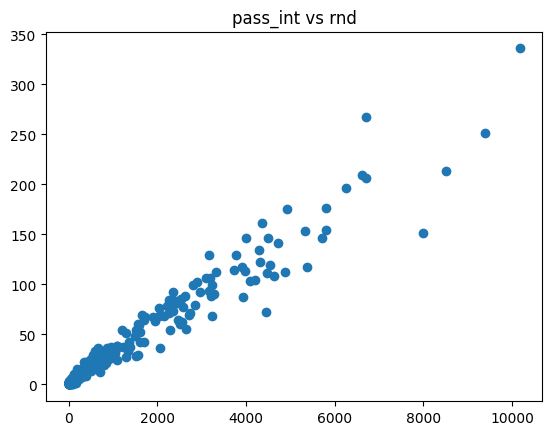

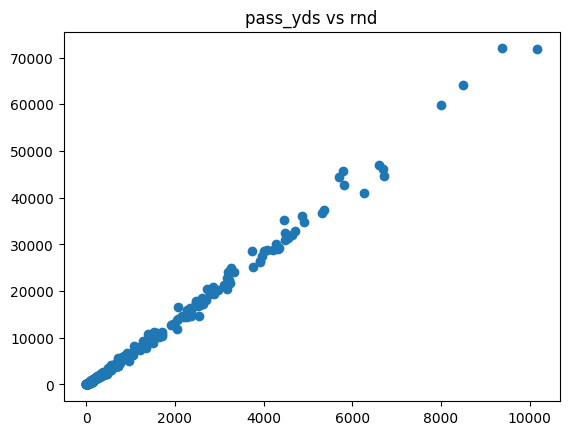

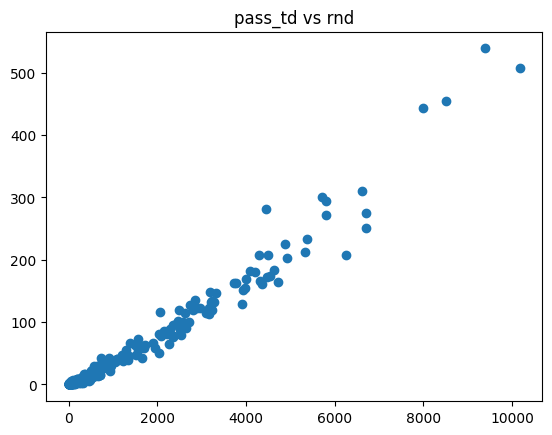

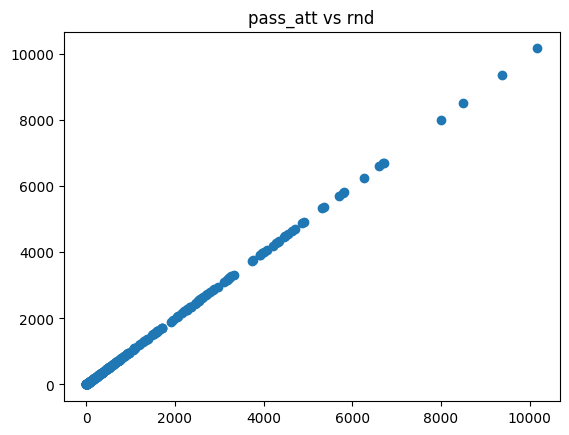

      pass_int  pass_yds  pass_td  pass_att  rnd
0         25.0    6722.0     42.0     913.0    1
1         18.0    5590.0     42.0     725.0    1
88         0.0      31.0      0.0       7.0    3
102        1.0     182.0      1.0      34.0    4
146        1.0      17.0      0.0       7.0    5
...        ...       ...      ...       ...  ...
8135     134.0   29979.0    207.0    4289.0    2
8155      36.0    6075.0     40.0     932.0    3
8240      42.0   10439.0     62.0    1701.0    6
8241      19.0    2584.0     11.0     464.0    6
8383      68.0   14715.0     86.0    2151.0   11

[283 rows x 5 columns]


In [2]:
#Get the data

fname = "nfl_draft.csv"
data = pd.read_csv(fname)
features = ['pass_int', 'pass_yds', 'pass_td', 'pass_att']
label = ['rnd']

#Filter out players who never played
data_mask = (data['pos']) == 'QB'
data = data[data_mask]
X_y = features + label
total_data = data[X_y]
total_data= total_data.dropna()
#Split into features and label
X_r = total_data[features]
y_r = total_data[label]
#create sseparate plot for each element in array
for i in range(len(features)):
    plt.figure(i)
    plt.plot(X_r['pass_att'], X_r[features[i]], 'o')
    plt.title(features[i] + ' vs ' + label[0])
plt.show()
not_checked = True
print(total_data)


In [3]:
print(X_r)

      pass_int  pass_yds  pass_td  pass_att
0         25.0    6722.0     42.0     913.0
1         18.0    5590.0     42.0     725.0
88         0.0      31.0      0.0       7.0
102        1.0     182.0      1.0      34.0
146        1.0      17.0      0.0       7.0
...        ...       ...      ...       ...
8135     134.0   29979.0    207.0    4289.0
8155      36.0    6075.0     40.0     932.0
8240      42.0   10439.0     62.0    1701.0
8241      19.0    2584.0     11.0     464.0
8383      68.0   14715.0     86.0    2151.0

[283 rows x 4 columns]


In [4]:
import warnings
warnings.filterwarnings("error")
print(X_r.shape)
for index, row in X_r.iterrows():
    if not_checked:
        if row['pass_yds']  == 0 or row['pass_td'] == 0:
            row['pass_td'] = 0
            row['pass_yds'] = 0
            continue
        # try:
        row['pass_int'] = row['pass_int'] / row['pass_att']
        row['pass_yds'] = row['pass_yds'] / row['pass_att']
        row['pass_td'] = row['pass_td'] / row['pass_att']
        # except:
        #     row['pass_int'] = 0
        #     row['pass_yds'] = 0
        #     row['pass_td'] = 0
        #     row.drop(index, inplace=True)
        # print(row)
not_checked = False
#The DATA I WILL USE
y_t = X_r['pass_td']
# print(y_t)
X_t = X_r['pass_yds']
# print(X_t)


(283, 4)


In [5]:
print(X_t.shape)

(283,)


In [6]:
print(X_t.max())
print(y_t.max())

15.0
0.2


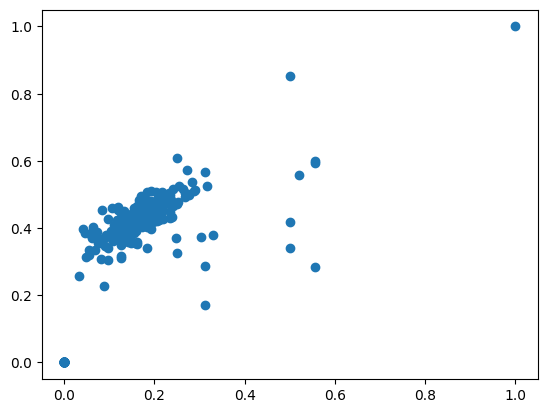

In [7]:
#Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_names = X_r.copy()
X = scaler_x.fit_transform(X_t.to_numpy().reshape(-1, 1))
y = scaler_y.fit_transform(y_t.to_numpy().reshape(-1, 1))
plt.plot(y, X, 'o')

In [8]:
#Before anything, take out 10% for later
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(y_test)

[[0.23442518]
 [0.        ]
 [0.20639417]
 [0.2       ]
 [0.20628684]
 [0.11853448]
 [0.        ]
 [0.3125    ]
 [0.17045455]
 [0.09615385]
 [0.        ]
 [0.11111111]
 [0.18691589]
 [0.18382353]
 [0.20618557]
 [0.16216216]
 [0.21223471]
 [0.15691869]
 [0.19410134]
 [0.19040903]
 [0.15799868]
 [0.19179304]
 [0.10909091]
 [0.19186315]
 [0.        ]
 [0.1961927 ]
 [0.11700468]
 [0.55555556]
 [0.12773723]]


In [9]:
#Dummy Regressor
dummy = DummyRegressor(strategy="mean")
#Use K Fold
kf = KFold(5, shuffle=True, random_state=42)
#Use Kfold on DummyRegressor
scores = cross_val_score(dummy, X, y, cv=kf, scoring='neg_mean_squared_error')
print(-scores.mean())


0.012951138907248461


8


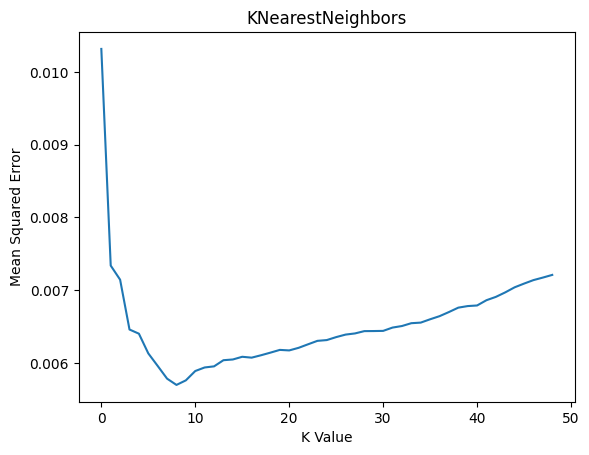

In [10]:
#K Nearest Neighbors
k = 1
knn = neighbors.KNeighborsRegressor(k, weights="uniform")

cross_val_kwargss ={ 'scoring': 'neg_mean_squared_error', 'cv': KFold(5, shuffle=True, random_state=42)}

# y_ = knn.fit(X, y)
def compute_error_kfold_k(
    x_fields,
    y_field,
    tree_kwargs={},
    cross_val_kwargs={},
):
    tree_r = neighbors.KNeighborsRegressor(**tree_kwargs)
    scores = cross_val_score(tree_r, x_fields, y_field, **cross_val_kwargs)
    # print(scores)
    return scores.mean(), scores.std()
means = []
for i in range(1,50):
    k = i
    scores, _ = compute_error_kfold_k(X, y, tree_kwargs={"n_neighbors": k}, cross_val_kwargs=cross_val_kwargss)
    # print(scores.mean())
    means.append(-scores.mean())
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("KNearestNeighbors")
plt.plot(means)
print(np.argmin(means))
best_k = np.argmin(means)

In [11]:
#Binary Tree Regression
opt = {
    # 'criterion': 'gini',
    'max_depth': 3,
    'min_samples_split':3,
    'min_samples_leaf': 2,
    'random_state': 42,
    'criterion': 'friedman_mse'
}


btr = tree.DecisionTreeRegressor(**opt)
scores_gini = cross_val_score(
    btr, 
    X, 
    y, 
    cv=KFold(5, shuffle=True, random_state=42))

print(scores_gini)
print(f"Error new: {scores_gini.mean()} with standard deviation of {scores_gini.std()}")


[0.55739013 0.44367161 0.55040564 0.79182116 0.49558837]
Error new: 0.5677753818817842 with standard deviation of 0.11934720935122177


In [12]:
def compute_error_kfold(
    x_fields,
    y_field,
    tree_kwargs={},
    cross_val_kwargs={},
):
    tree_r = tree.DecisionTreeRegressor(**tree_kwargs)
    scores = cross_val_score(tree_r, x_fields, y_field, **cross_val_kwargs)
    # print(scores)
    return scores.mean(), scores.std()

In [13]:
best_depth = 0
best_leaf = 0
best_split = 0
#Binary Tree Regression
opt = {
    # 'criterion': 'gini',
    'max_depth': 3,
    'min_samples_split':3,
    'min_samples_leaf': 2,
    'random_state': 42,
    'criterion': 'friedman_mse'
}

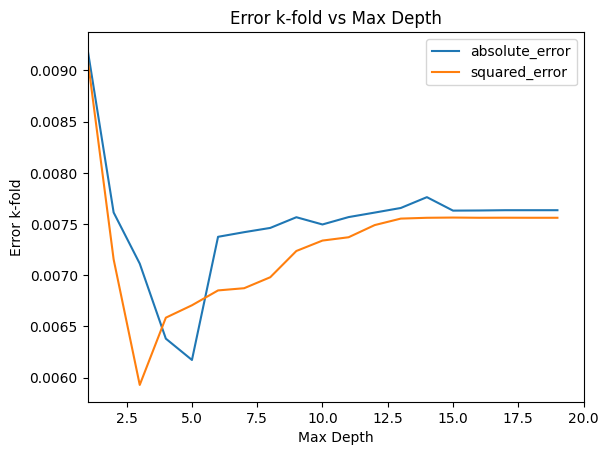

In [14]:
gini_error_new = []
entropy_error_new = []
# if best_depth:
#     opt['max_depth'] = best_depth
# if best_leaf:
#     opt['min_samples_leaf'] = best_leaf
# if best_split:
#     opt['min_samples_split'] = best_split

hyp_range = (1,20)
cross_val_kwargss ={ 'scoring': 'neg_mean_squared_error', 'cv': KFold(5, shuffle=True, random_state=42)}
for max_depth in range(*hyp_range):
    opt['max_depth'] = max_depth
    opt['criterion']='absolute_error'    
    gini_mean, _ = compute_error_kfold(
        X, 
        y, 
        opt,
        cross_val_kwargss
    )
    opt['criterion']= 'squared_error'
    entropy_mean, _ = compute_error_kfold(
        X, 
        y, 
        opt,
        cross_val_kwargss
    )

    gini_error_new.append(-gini_mean)
    entropy_error_new.append(-entropy_mean)


plt.plot(range(*hyp_range), gini_error_new, label='absolute_error')
ax = plt.gca()
plt.plot(range(*hyp_range), entropy_error_new, label='squared_error')
ax.legend()
ax.set_xlabel('Max Depth')
ax.set_ylabel('Error k-fold')
ax.set_title('Error k-fold vs Max Depth')
# ax.set_ylim(-.1,1)
ax.set_xlim(*hyp_range)
plt.show()
best_depth = np.argmin(gini_error_new)


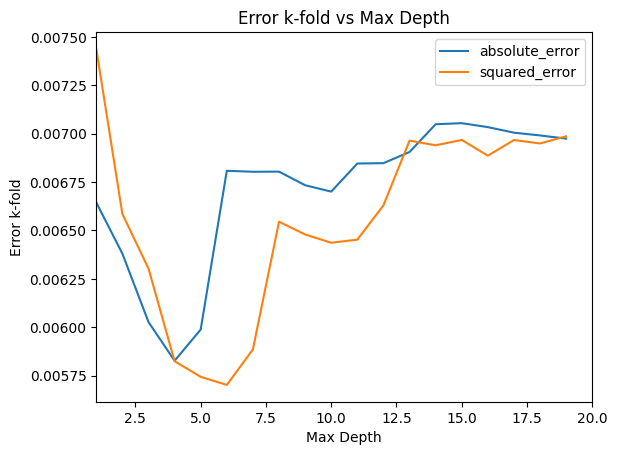

In [15]:
gini_error_new = []
entropy_error_new = []
hyp_range = (1,20)
if best_depth:
    opt['max_depth'] = best_depth
# if best_leaf:
#     opt['min_samples_leaf'] = best_leaf
# if best_split:
#     opt['min_samples_split'] = best_split
cross_val_kwargss ={ 'scoring': 'neg_mean_squared_error', 'cv': KFold(5, shuffle=True, random_state=42)}
for min_leaf in range(*hyp_range):
    opt['min_samples_leaf'] = min_leaf
    opt['criterion']='absolute_error'    
    gini_mean, _ = compute_error_kfold(
        X, 
        y, 
        opt,
        cross_val_kwargss
    )
    opt['criterion']= 'squared_error'
    entropy_mean, _ = compute_error_kfold(
        X, 
        y, 
        opt,
        cross_val_kwargss
    )

    gini_error_new.append(-gini_mean)
    entropy_error_new.append(-entropy_mean)


plt.plot(range(*hyp_range), gini_error_new, label='absolute_error')
ax = plt.gca()
plt.plot(range(*hyp_range), entropy_error_new, label='squared_error')
ax.legend()
ax.set_xlabel('Max Depth')
ax.set_ylabel('Error k-fold')
ax.set_title('Error k-fold vs Max Depth')
# ax.set_ylim(-.1,1)
ax.set_xlim(*hyp_range)
plt.show()
best_leaf = np.argmin(gini_error_new)


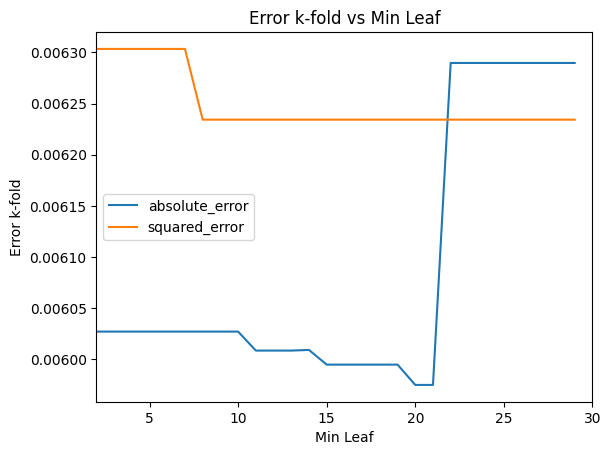

18


In [16]:
gini_error_new = []
entropy_error_new = []
hyp_range = (2,30)
if best_depth:
    opt['max_depth'] = best_depth
if best_leaf:
    opt['min_samples_leaf'] = best_leaf
if best_split:
    opt['min_samples_split'] = best_split
cross_val_kwargss ={ 'scoring': 'neg_mean_squared_error', 'cv': KFold(5, shuffle=True, random_state=42)}
for min_split in range(*hyp_range):
    opt['min_samples_split'] = min_split
    opt['criterion']='absolute_error'    
    gini_mean, _ = compute_error_kfold(
        X, 
        y, 
        opt,
        cross_val_kwargss
    )
    opt['criterion']= 'squared_error'
    entropy_mean, _ = compute_error_kfold(
        X, 
        y, 
        opt,
        cross_val_kwargss
    )

    gini_error_new.append(-gini_mean)
    entropy_error_new.append(-entropy_mean)


plt.plot(range(*hyp_range), gini_error_new, label='absolute_error')
ax = plt.gca()
plt.plot(range(*hyp_range), entropy_error_new, label='squared_error')
ax.legend()
ax.set_xlabel('Min Leaf')
ax.set_ylabel('Error k-fold')
ax.set_title('Error k-fold vs Min Leaf')
# ax.set_ylim(-.1,1)
ax.set_xlim(*hyp_range)
plt.show()
best_split = np.argmin(gini_error_new)
print(best_split)


In [17]:
print(best_depth, best_leaf, best_split)

4 3 18


In [18]:
gini_error_new = []
entropy_error_new = []
hyp_range = (2,10)
minimum_g = 1
minimum_e = 1
#for loop to find best split, best depth, best leaf
for max_depth in range(*hyp_range):

    opt['max_depth'] = max_depth
    for min_leaf in range(*hyp_range):
        opt['min_samples_leaf'] = min_leaf
        for min_split in range(*hyp_range):
            opt['min_samples_split'] = min_split
            cross_val_kwargss ={ 'scoring': 'neg_mean_squared_error', 'cv': KFold(5, shuffle=True, random_state=42)}
            for min_split in range(*hyp_range):
                opt['min_samples_split'] = min_split
                opt['criterion']='absolute_error'    
                gini_mean, _ = compute_error_kfold(
                    X, 
                    y, 
                    opt,
                    cross_val_kwargss
                )
                opt['criterion']= 'squared_error'
                entropy_mean, _ = compute_error_kfold(
                    X, 
                    y, 
                    opt,
                    cross_val_kwargss
                )

                gini_error_new.append(-gini_mean)
                entropy_error_new.append(-entropy_mean)
                if minimum_g > -gini_mean:
                    print("gini", max_depth, min_leaf, min_split, gini_mean)
                    minimum_g = -gini_mean
                if minimum_e > -entropy_mean:
                    print("entropy", max_depth, min_leaf, min_split, entropy_mean)
                    minimum_e = -entropy_mean
                
#get minimum of gini and entropy
if minimum_g < minimum_e:
    mse_tree = minimum_g
else:       
    mse_tree = minimum_e

# plt.plot(range(*hyp_range), gini_error_new, label='absolute_error')
# ax = plt.gca()
# plt.plot(range(*hyp_range), entropy_error_new, label='squared_error')
# ax.legend()
# ax.set_xlabel('Max Depth')
# ax.set_ylabel('Error k-fold')
# ax.set_title('Error k-fold vs Max Depth')
# # ax.set_ylim(-.1,1)
# ax.set_xlim(*hyp_range)
# plt.show()
# best_split = np.argmin(gini_error_new)
# print(best_split)


gini 2 2 2 -0.00761307073799025
entropy 2 2 2 -0.007154910030523884


entropy 2 3 2 -0.006605168338230385
entropy 2 5 2 -0.006299405329822805
entropy 2 6 2 -0.006278291240685419
gini 3 2 2 -0.007113372192599264
entropy 3 2 2 -0.005928405053687687
gini 3 2 6 -0.007074765784101098
entropy 3 3 2 -0.005880972114267146
entropy 3 3 8 -0.00581185461842859
gini 3 4 2 -0.006815214994617305
gini 3 5 2 -0.006813850119458046
entropy 3 5 2 -0.005652520462624829
entropy 3 6 2 -0.005634877402232572
gini 4 2 2 -0.006380394305713433
gini 4 2 6 -0.006341787897215266
gini 4 3 2 -0.006027142289574872
gini 4 4 2 -0.005826993881904221
gini 5 4 2 -0.005747819959017907


{'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 9, 'random_state': 42, 'criterion': 'squared_error'}
[[0.01705632]]


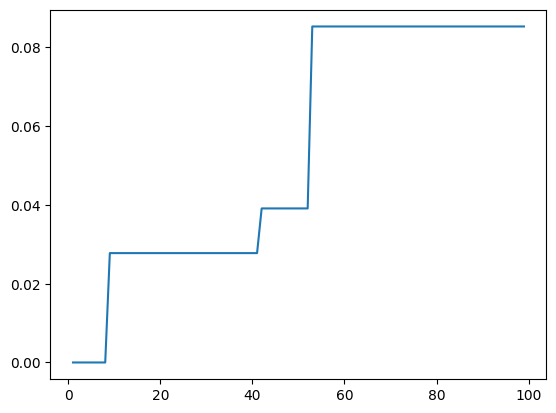

In [19]:
#eval
opt['max_depth'] = 3
print(opt)
btr = tree.DecisionTreeRegressor(**opt)

btr.fit(X,y)
a_m = []
for i in range(1,100):
    a = btr.predict([[i/100]])
    a = scaler_y.inverse_transform(a.reshape(1,-1))
    a_m.append(a[0][0])
plt.plot(range(1,100), a_m)
print(scaler_y.inverse_transform(a))
# print(scaler_y.inverse_transform([[.02]]))
# print(scaler_y.inverse_transform(y))
# print(scaler_x.inverse_transform(X))
# print(X)

mse_tree 0.0028553397484603355
mse_kmap 0.0033325123482026804
mse_dummy 0.011047075083048273


<BarContainer object of 6 artists>

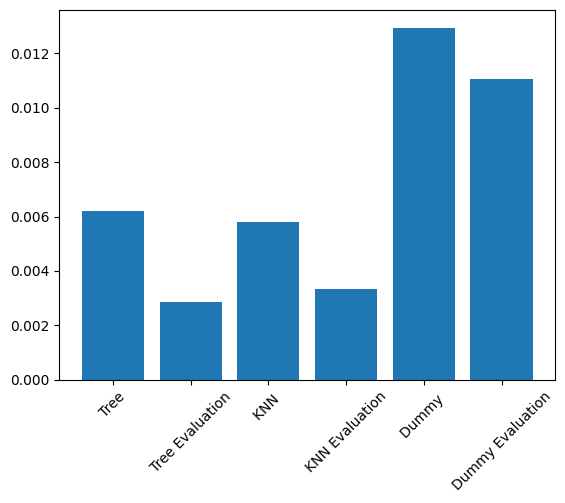

In [31]:
# from sklearn.metrics import neg_mean_squared_error

opt_se = {
    # 'criterion': 'gini',
    'max_depth': 3,
    'min_samples_split':6,
    'min_samples_leaf': 2,
    'random_state': 42,
    'criterion': 'squared_error'
}
opt_ae = {
    # 'criterion': 'gini',
    'max_depth': 6,
    'min_samples_split':3,
    'min_samples_leaf': 9,
    'random_state': 42,
    'criterion': 'absolute_error'
}
kf = KFold(5, shuffle=True, random_state=42)


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
decision_tree_final = tree.DecisionTreeRegressor(**opt_se)
knn_final = neighbors.KNeighborsRegressor(best_k, weights="uniform")
dummy_final = DummyRegressor(strategy="mean")
tree_e = (cross_val_score(decision_tree_final, X, y,
                           cv=kf, scoring='neg_mean_squared_error').mean())
knn_e = (cross_val_score(knn_final, X, y, cv=kf, scoring='neg_mean_squared_error').mean())
dummy_e = (cross_val_score(dummy_final, X, y, cv=kf, scoring='neg_mean_squared_error').mean())

decision_tree_final.fit(X,y)
knn_final.fit(X,y)
dummy_final.fit(X,y)
mse_tree = mean_squared_error(y_test, decision_tree_final.predict(X_test))
mse_kmap = mean_squared_error(y_test, knn_final.predict(X_test))
mse_dummy = mean_squared_error(y_test, dummy_final.predict(X_test))


print("mse_tree", mse_tree)
print("mse_kmap", mse_kmap)
print("mse_dummy", mse_dummy)
new_error = [-tree_e, mse_tree, -knn_e, mse_kmap, -dummy_e, mse_dummy] 
name_errorss = ['Tree', 'Tree Evaluation', 'KNN ', 'KNN Evaluation', 'Dummy ', 'Dummy Evaluation'] 
#plot these in pairs
plt.xticks(rotation=45)
plt.bar(name_errorss, new_error)

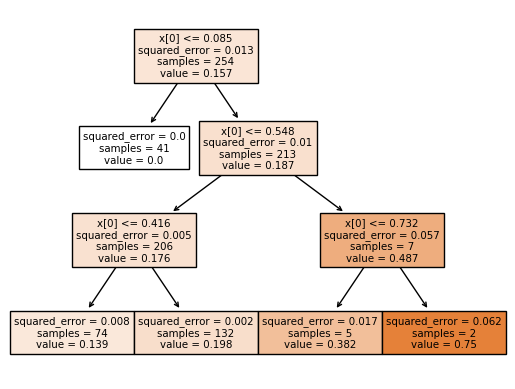

In [22]:
plt.figure()
tree.plot_tree(decision_tree_final,filled=True)  
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")
